In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import os
print(os.listdir("../input/titanic"))

dataset = pd.read_csv('../input/titanic/train.csv') # обучающая выборка
X_test = pd.read_csv('../input/titanic/test.csv') # тестовая выборка
print(dataset.shape) # структура датасета
print(dataset[:10]) # первые 10 значений

dataset.info()

dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
dataset[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
dataset[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
['test.csv', 'train.csv', 'gender_submission.csv']
(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Hen

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


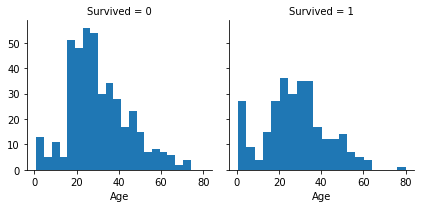

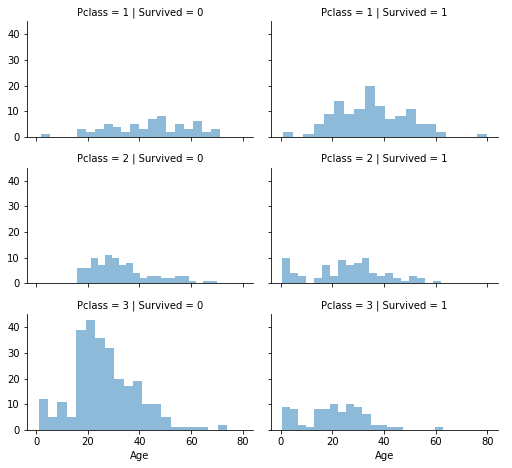

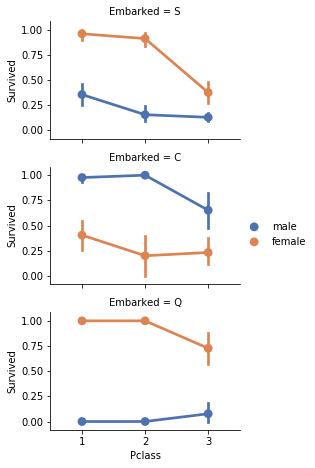

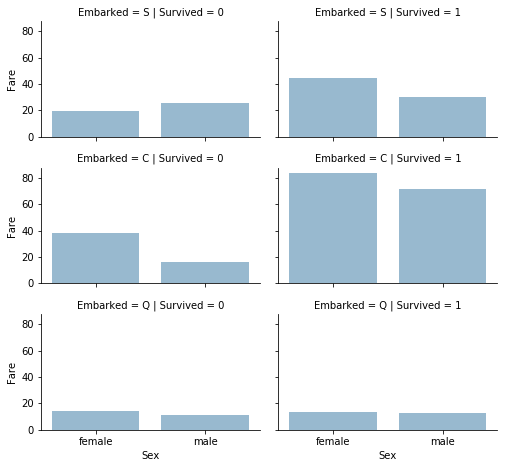

In [2]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)

grid = sns.FacetGrid(dataset, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

grid = sns.FacetGrid(dataset, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

grid = sns.FacetGrid(dataset, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()



In [3]:
    
dataset_title = [i.split(',')[1].split('.')[0].strip() for i in dataset['Name']]
dataset['Title'] = pd.Series(dataset_title)
dataset['Title'].value_counts()
dataset['Title'] = dataset['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')

dataset_title = [i.split(',')[1].split('.')[0].strip() for i in X_test['Name']]
X_test['Title'] = pd.Series(dataset_title)
X_test['Title'].value_counts()
X_test['Title'] = X_test['Title'].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Ms', 'Mme', 'Mlle'], 'Rare')

dataset['FamilyS'] = dataset['SibSp'] + dataset['Parch'] + 1
X_test['FamilyS'] = X_test['SibSp'] + X_test['Parch'] + 1

def family(x):
    if x < 2:
        return 'Single'
    elif x == 2:
        return 'Couple'
    elif x <= 4:
        return 'InterM'
    else:
        return 'Large'
    
dataset['FamilyS'] = dataset['FamilyS'].apply(family)
X_test['FamilyS'] = X_test['FamilyS'].apply(family)

dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
X_test['Embarked'].fillna(X_test['Embarked'].mode()[0], inplace=True)
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].median(), inplace=True)

dataset = dataset.drop(['PassengerId', 'Cabin', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1)
X_test_passengers = X_test['PassengerId']
X_test = X_test.drop(['PassengerId', 'Cabin', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1)

print('dataset_info:')
dataset.info()
print(dataset.shape)
print(X_test.shape)

X_train = dataset.iloc[:, 1:9].values
Y_train = dataset.iloc[:, 0].values
X_test = X_test.values
print(X_train.shape, X_test.shape)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#
labelencoder_X_1 = LabelEncoder()
X_train[:, 1] = labelencoder_X_1.fit_transform(X_train[:, 1])
X_train[:, 4] = labelencoder_X_1.fit_transform(X_train[:, 4])
X_train[:, 5] = labelencoder_X_1.fit_transform(X_train[:, 5])
X_train[:, 6] = labelencoder_X_1.fit_transform(X_train[:, 6])

labelencoder_X_2 = LabelEncoder()
X_test[:, 1] = labelencoder_X_2.fit_transform(X_test[:, 1])
X_test[:, 4] = labelencoder_X_2.fit_transform(X_test[:, 4])
X_test[:, 5] = labelencoder_X_2.fit_transform(X_test[:, 5])
X_test[:, 6] = labelencoder_X_2.fit_transform(X_test[:, 6])


numeric_features = [0]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = [1,4,5,6]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

columnTrans = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                              ('cat', categorical_transformer, categorical_features)])
#columnTrans = OneHotEncoder(categorical_features = [0, 1, 4, 5, 6])
X_train = columnTrans.fit_transform(X_train)
X_test = columnTrans.fit_transform(X_test)
print(X_train.shape)
print(X_test.shape)
#
print(X_train.shape)

print(X_test.shape)

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.1)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)
print(dataset.shape) # структура датасета
print(dataset[:10]) # первые 10 значений
dataset.info()
print('END OF PART 1')

dataset_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null object
Title       891 non-null object
FamilyS     891 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 55.8+ KB
(891, 8)
(418, 7)
(891, 7) (418, 7)
(891, 15)
(418, 15)
(891, 15)
(418, 15)
(801, 15) (801,) (90, 15) (90,)
(891, 8)
   Survived  Pclass     Sex   Age     Fare Embarked   Title FamilyS
0         0       3    male  22.0   7.2500        S      Mr  Couple
1         1       1  female  38.0  71.2833        C     Mrs  Couple
2         1       3  female  26.0   7.9250        S    Miss  Single
3         1       1  female  35.0  53.1000        S     Mrs  Couple
4         0       3    male  35.0   8.0500        S      Mr  Single
5         0       3    male  28.0   8.

In [4]:
import torch
import keras
from torch import optim, nn
from keras.utils import to_categorical
from keras import models
from keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# добавляем типовую функцию "шаг обучения"
def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step
lr = 0.01
n_epochs = 50

input_size = 15
hidden_size1 = 512
hidden_size2 = 100
hidden_size3 = 100
output_size = 2



model = torch.nn.Sequential(
    
    nn.Linear(input_size, hidden_size1),
    nn.ReLU(),
    
    nn.Dropout(0.2),
    nn.Linear(hidden_size1, hidden_size2),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(hidden_size2, hidden_size3),
    nn.Softmax(1),
    nn.Linear(hidden_size3, output_size))
    


loss_fn = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
train_step = make_train_step(model, loss_fn, optimizer)

from sklearn.utils import shuffle

for epoch in range(n_epochs):
    if epoch % 5 == 0:
        print('Эпоха {}'.format(epoch+1))
    x_train, y_train = shuffle(x_train, y_train) # случайно перетасуем данные
    X = torch.FloatTensor(x_train)
    y = torch.LongTensor(y_train)
    loss = train_step(X, y)
    
print('LOSS:', loss)

# оцениваем модель:
test_var = torch.FloatTensor(x_val)
with torch.no_grad():
    result = model(test_var)
values, labels = torch.max(result, 1)
num_right = np.sum(labels.data.numpy() == y_val)
print('Точность {:.2f}'.format(num_right / len(y_val)))


Using TensorFlow backend.


Эпоха 1
Эпоха 6
Эпоха 11
Эпоха 16
Эпоха 21
Эпоха 26
Эпоха 31
Эпоха 36
Эпоха 41
Эпоха 46
LOSS: 0.47382548451423645
Точность 0.80


In [5]:
"""
import csv

with torch.no_grad():
    result = model(torch.FloatTensor(X_test))
values, labels = torch.max(result, 1)
survived = labels.data.numpy()
submission = [['PassengerId', 'Survived']]
for i in range(len(survived)):
    submission.append([X_test_passengers[i], survived[i]])
    
with open('submission.csv', 'w') as submissionFile:
    writer = csv.writer(submissionFile)
    writer.writerows(submission)
    
print('Файл для соревнования подготовлен!')

!head submission.csv
"""

"\nimport csv\n\nwith torch.no_grad():\n    result = model(torch.FloatTensor(X_test))\nvalues, labels = torch.max(result, 1)\nsurvived = labels.data.numpy()\nsubmission = [['PassengerId', 'Survived']]\nfor i in range(len(survived)):\n    submission.append([X_test_passengers[i], survived[i]])\n    \nwith open('submission.csv', 'w') as submissionFile:\n    writer = csv.writer(submissionFile)\n    writer.writerows(submission)\n    \nprint('Файл для соревнования подготовлен!')\n\n!head submission.csv\n"

In [6]:
"""
%env KAGGLE_USERNAME=ваш-логин
%env KAGGLE_KEY=ваш-секретный-ключ-kaggle
!export -p | grep KAGGLE_
!pip install kaggle --upgrade
!kaggle competitions submit -c titanic -f submission.csv -m "Titanic-1"
"""


'\n%env KAGGLE_USERNAME=ваш-логин\n%env KAGGLE_KEY=ваш-секретный-ключ-kaggle\n!export -p | grep KAGGLE_\n!pip install kaggle --upgrade\n!kaggle competitions submit -c titanic -f submission.csv -m "Titanic-1"\n'